# Import Packages

In [99]:
import json
import os
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import re
import altair as alt

# Load Data

In [63]:
output_dir = "output_data/"
file = "response1.pki"
raw_data = pd.read_pickle(output_dir + file)
raw_data = raw_data[["time", "Log ID", "Machine ID", "command", "stderr", "stdout"]]
raw_data

,time,Log ID,Machine ID,command,stderr,stdout
0,2022-09-29 19:19:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,data\nhome\nstderr.txt\nSuperShell
1,2022-09-29 19:20:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,data\nhome\nstderr.txt\nSuperShell
2,2022-09-29 19:20:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,clear,,[H[2J[3J
3,2022-09-29 19:24:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,/home/jovyan/.offline.sh: line 354: cd: Bash: ...,
4,2022-09-29 19:24:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,
5,2022-09-29 19:24:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,sdgeorge\nshared
6,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,
7,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,
8,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,input\niplant\noutput
9,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,


In [64]:
raw_data.describe()

<ipython-input-64-7a57e84b5e52>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.describe()


,time,Log ID,Machine ID,command,stderr,stdout
count,27,27,27,27,27,27
unique,9,2,2,4,9,8
top,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,
freq,6,14,14,16,19,16
first,2022-09-29 19:19:00,NaN,NaN,NaN,NaN,NaN
last,2022-10-14 00:23:00,NaN,NaN,NaN,NaN,NaN


# Pandas Processing

## Error count for each command

In [88]:
r = re.compile(r'.*((N|n)o).*')

In [89]:
raw_data["count_ls"] = raw_data["command"].str.count("ls")
raw_data["count_cd"] = raw_data["command"].str.count("cd")
raw_data["error"] = raw_data.stderr.apply(lambda x: bool(r.match(x)))
raw_data

,time,Log ID,Machine ID,command,stderr,stdout,count_ls,count_cd,error
0,2022-09-29 19:19:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,data\nhome\nstderr.txt\nSuperShell,1,0,False
1,2022-09-29 19:20:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,data\nhome\nstderr.txt\nSuperShell,1,0,False
2,2022-09-29 19:20:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,clear,,[H[2J[3J,0,0,False
3,2022-09-29 19:24:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,/home/jovyan/.offline.sh: line 354: cd: Bash: ...,,0,1,True
4,2022-09-29 19:24:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,,0,1,False
5,2022-09-29 19:24:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,sdgeorge\nshared,1,0,False
6,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,,0,1,False
7,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,,0,1,False
8,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,ls,,input\niplant\noutput,1,0,False
9,2022-09-29 19:25:00,6c940b1fbdd022d6db2d5840dfd7207c30a060b05b4353...,a9321,cd,,,0,1,False


In [93]:
selected_data = raw_data[["time", "command", "error"]]
selected_data

,time,command,error
0,2022-09-29 19:19:00,ls,False
1,2022-09-29 19:20:00,ls,False
2,2022-09-29 19:20:00,clear,False
3,2022-09-29 19:24:00,cd,True
4,2022-09-29 19:24:00,cd,False
5,2022-09-29 19:24:00,ls,False
6,2022-09-29 19:25:00,cd,False
7,2022-09-29 19:25:00,cd,False
8,2022-09-29 19:25:00,ls,False
9,2022-09-29 19:25:00,cd,False


### Plot frequency of error for each command

In [111]:
selected_data["error"] = selected_data["error"].astype(int)
selected_data

<ipython-input-111-57a08604f9b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["error"] = selected_data["error"].astype(int)


,time,command,error
0,2022-09-29 19:19:00,ls,0
1,2022-09-29 19:20:00,ls,0
2,2022-09-29 19:20:00,clear,0
3,2022-09-29 19:24:00,cd,1
4,2022-09-29 19:24:00,cd,0
5,2022-09-29 19:24:00,ls,0
6,2022-09-29 19:25:00,cd,0
7,2022-09-29 19:25:00,cd,0
8,2022-09-29 19:25:00,ls,0
9,2022-09-29 19:25:00,cd,0


array([[<AxesSubplot:title={'center':'cd'}>,
        <AxesSubplot:title={'center':'clear'}>],
       [<AxesSubplot:title={'center':'ls'}>,
        <AxesSubplot:title={'center':'mkdir'}>]], dtype=object)

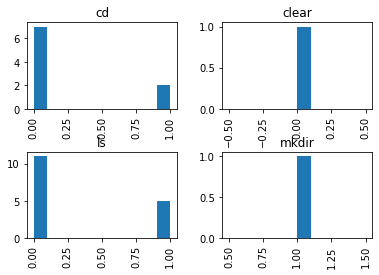

In [112]:
selected_data.hist(column="error", by="command")

array([<AxesSubplot:title={'center':'a8c71'}>,
       <AxesSubplot:title={'center':'a9321'}>], dtype=object)

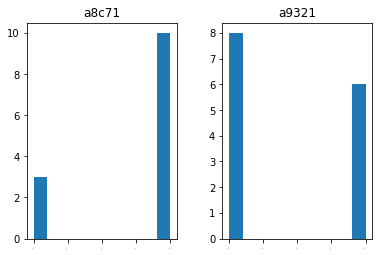

In [103]:
raw_data.hist(column="count_ls", by="Machine ID", xlabelsize=1)

# Pandas Processing 

In [67]:
raw_data.dtypes

time          datetime64[ns]
Log ID                object
Machine ID            object
command               object
stderr                object
stdout                object
count_ls               int64
count_cd               int64
dtype: object

## Completion time

In [68]:
tutorial_time = raw_data["time"].max() - raw_data["time"].min()
print(tutorial_time)

14 days 05:04:00


In [97]:
group_by_test = raw_data.groupby("Machine ID")

In [70]:
first_group = raw_data[raw_data["Machine ID"] == "a8c71"]
first_group

,time,Log ID,Machine ID,command,stderr,stdout,count_ls,count_cd
14,2022-10-13 23:59:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,,data\nhome\nstderr.txt\nSuperShell,1,0
15,2022-10-14 00:01:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,,data\nhome\nstderr.txt\nSuperShell,1,0
16,2022-10-14 00:01:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,ls: cannot access '/home/jovyan/RNA_SEQ_SAMPLE...,,1,0
17,2022-10-14 00:22:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,,gunings\nshared,1,0
18,2022-10-14 00:22:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,ls: cannot access 'gunings/RNA_SEQ_SAMPLES': N...,,1,0
19,2022-10-14 00:22:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,ls: cannot access '/gunings/RNA_SEQ_SAMPLES': ...,,1,0
20,2022-10-14 00:22:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,ls: cannot access 'gunings': No such file or d...,,1,0
21,2022-10-14 00:22:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,cd,/home/jovyan/.offline.sh: line 354: cd: guning...,,0,1
22,2022-10-14 00:23:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,ls,,data\nhome\nstderr.txt\nSuperShell,1,0
23,2022-10-14 00:23:00,3a15d2c2e44e3c8d8ff99321addf6374e8c7966cbd98d8...,a8c71,cd,,,0,1
